# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
crr = app_train.corr()['TARGET']

## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [6]:
crr.sort_values(ascending=False).head(15)

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [7]:
crr.sort_values(ascending=True).head(15)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [8]:
app_train['EXT_SOURCE_3']

0         0.139376
1              NaN
2         0.729567
3              NaN
4              NaN
            ...   
307506         NaN
307507         NaN
307508    0.218859
307509    0.661024
307510    0.113922
Name: EXT_SOURCE_3, Length: 307511, dtype: float64

In [9]:
sum(app_train['EXT_SOURCE_3'].isnull())/app_train.shape[0]

0.19825307062186392

In [10]:
app_train[~app_train['EXT_SOURCE_3'].isnull()]['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

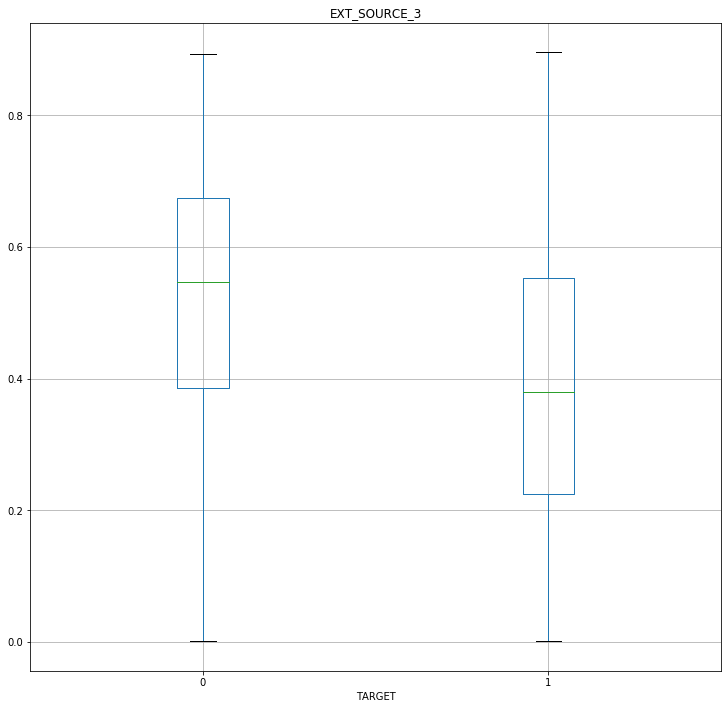

Correlation: -0.1789


In [11]:
df = app_train[["TARGET","EXT_SOURCE_3"]]
df_del = df.dropna()
df_del.boxplot(column='EXT_SOURCE_3', by = 'TARGET', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()
corr = np.corrcoef(df_del['EXT_SOURCE_3'], df_del['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

In [12]:
app_train[app_train['EXT_SOURCE_3'].isnull()]['TARGET'].value_counts()

0    55288
1     5677
Name: TARGET, dtype: int64

### 可發現EXT_SOURCE_3分數越低或甚至沒有分數的人，有違約風險的機會越高。

In [13]:
app_train[['EXT_SOURCE_2','EXT_SOURCE_1']]

,EXT_SOURCE_2,EXT_SOURCE_1
0,0.262949,0.083037
1,0.622246,0.311267
2,0.555912,NaN
3,0.650442,NaN
4,0.322738,NaN
...,...,...
307506,0.681632,0.145570
307507,0.115992,NaN
307508,0.535722,0.744026
307509,0.514163,NaN


In [14]:
sum(app_train['EXT_SOURCE_2'].isnull())/app_train.shape[0]

0.0021462646864665006

In [15]:
sum(app_train['EXT_SOURCE_1'].isnull())/app_train.shape[0]

0.5638107254699832

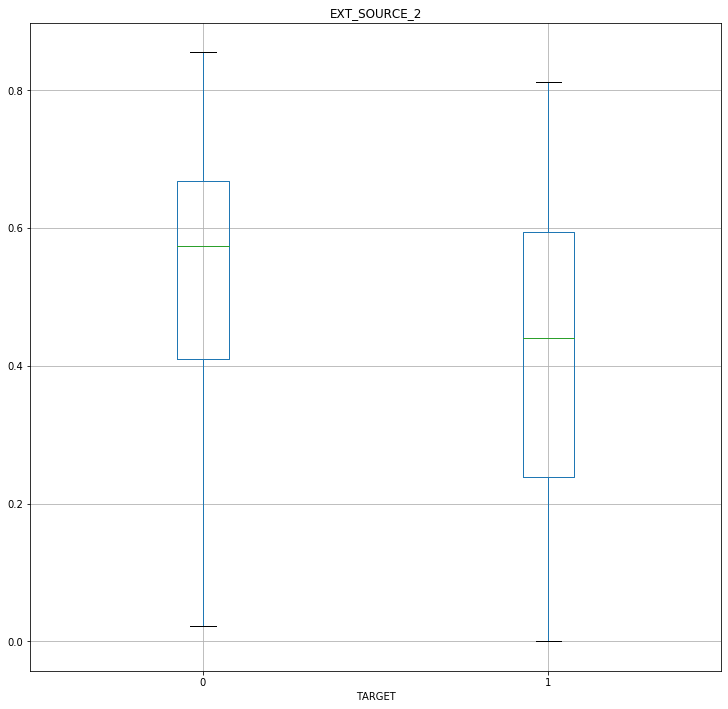

Correlation: -0.1605


In [16]:
df = app_train[["TARGET","EXT_SOURCE_2"]]
df_del = df.dropna()
df_del.boxplot(column='EXT_SOURCE_2', by = 'TARGET', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()
corr = np.corrcoef(df_del['EXT_SOURCE_2'], df_del['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

In [17]:
app_train[app_train['EXT_SOURCE_2'].isnull()]['TARGET'].value_counts()

0    608
1     52
Name: TARGET, dtype: int64

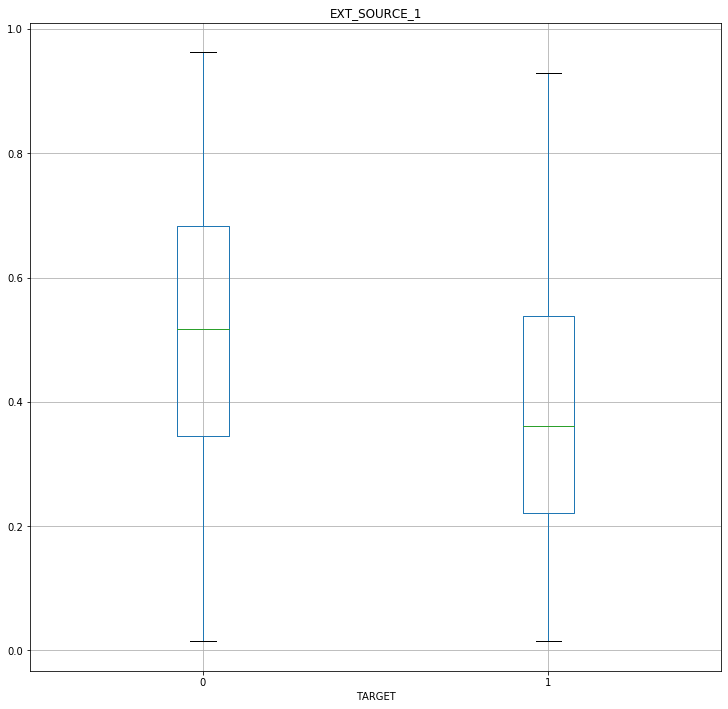

Correlation: -0.1553


In [18]:
df = app_train[["TARGET","EXT_SOURCE_1"]]
df_del = df.dropna()
df_del.boxplot(column='EXT_SOURCE_1', by = 'TARGET', showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()
corr = np.corrcoef(df_del['EXT_SOURCE_1'], df_del['TARGET'])
print("Correlation: %.4f" % (corr[0][1]))

In [19]:
app_train[app_train['EXT_SOURCE_1'].isnull()]['TARGET'].value_counts()

0    158607
1     14771
Name: TARGET, dtype: int64

### 同上，EXT_SOURCE_2、EXT_SOURCE_1分數越低或甚至沒有分數的人，有違約風險的機會越高。